<a href="https://colab.research.google.com/github/Ryan-spec/Portfolio-Projects/blob/master/Titanic_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survivor Analysis 

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [6]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [7]:
# Load the data into a dataframe and view the first 5 rows of data
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Get the number of rows and columns of the dataset
df.shape

(891, 12)

In [10]:
# Check for any missing data
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [11]:
# Get the extreme values for the age column
df['Age'].min(), df['Age'].max()

(0.42, 80.0)

We see that the minimum age was just 4 months, those being little babies, whilst the maximum age was 80 years.

In [12]:
# Get the number of people who survived and did not survived where 0 = "Did not survive" and 1 = "Survived"
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
# To view the data in %
df['Survived'].value_counts() * 100 / len(df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [14]:
# To view the gender distribution
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
# Getting the Passenger Class of the passengers
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
# In terms of percentage
df['Pclass'].value_counts() * 100 / len(df)

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

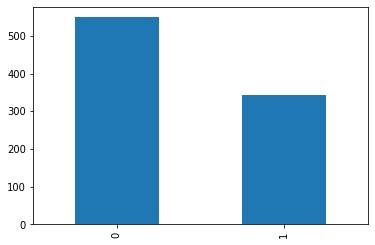

In [19]:
# Visualize the data

%matplotlib inline
alpha_color = 0.5
df['Survived'].value_counts().plot(kind='bar')

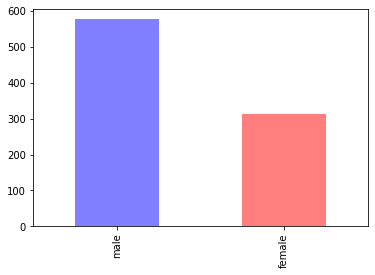

In [22]:
# To visualize the gender distribution of the above graph
df['Sex'].value_counts().plot(kind='bar',
                              color=['b','r'],
                              alpha = alpha_color)

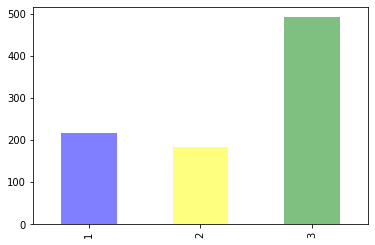

In [25]:
# To visualize the data in terms of passenger class

df['Pclass'].value_counts().sort_index().plot(kind='bar',
                              color=['blue','yellow', 'green'],
                              alpha = alpha_color)

We gather from this graph that the lower the class, the less likely you were to survive, as first preference went to the upper classes(wealthy).

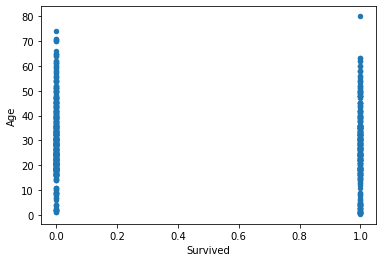

In [26]:
# To compare the variables of 'Survived' with 'Age' 

df.plot(kind='scatter', x='Survived', y= 'Age')

There seems to be even distribution.

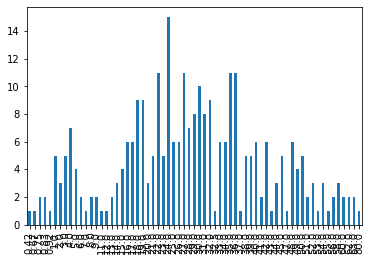

In [27]:
# To get a closer look at the age distribution of survived passengers where 'survived = 1'
df[df['Survived'] == 1]['Age'].value_counts().sort_index().plot(kind='bar')

In [28]:
# Clean it up a bit by binning
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeBin'] = pd.cut(df['Age'], bins)

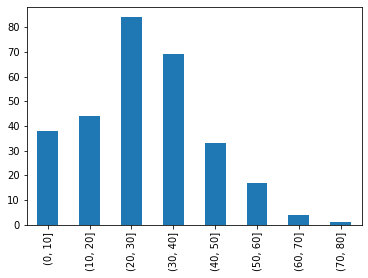

In [29]:

df[df['Survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

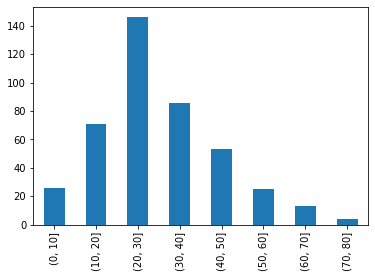

In [31]:
# The distribution where 'not survived' = 0 

df[df['Survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

We see only a slight difference, which means age does not tell us much about the survival.

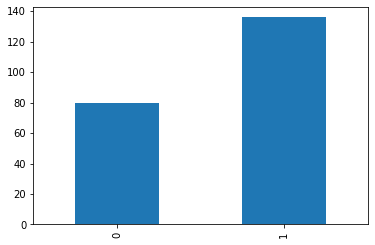

In [32]:
# To view the other variables
df[df['Pclass'] == 1]['Survived'].value_counts().sort_index().plot(kind='bar') #passengers survived from the 1st class

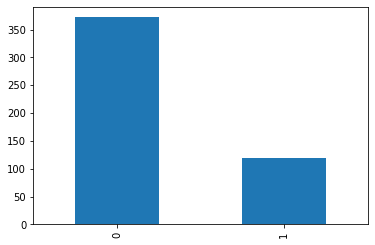

In [33]:
# Passengers survived from the 3rd class
df[df['Pclass'] == 3]['Survived'].value_counts().sort_index().plot(kind='bar')

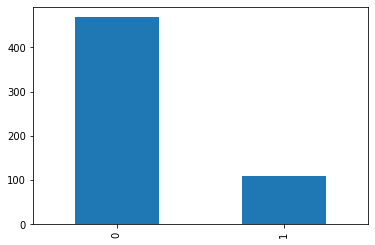

In [42]:
# How many of those were male
df[df['Sex'] == 'male']['Survived'].value_counts().sort_index().plot(kind='bar')

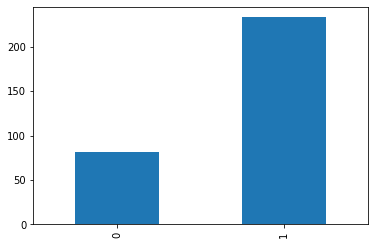

In [35]:
# How many were female
df[df['Sex'] == 'female']['Survived'].value_counts().sort_index().plot(kind='bar')

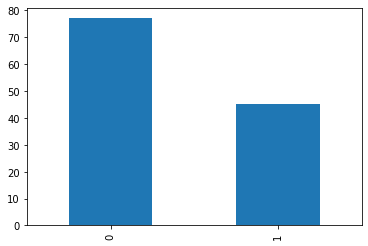

In [38]:
# 1st class male passenger survivors
df[(df['Sex'] == 'male') & (df['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

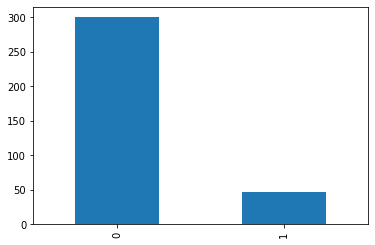

In [39]:
# 3rd class male passenger survivors
df[(df['Sex'] == 'male') & (df['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

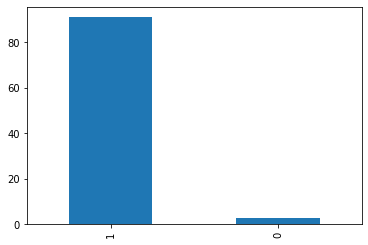

In [40]:
# 1st class female passenger survivors
df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

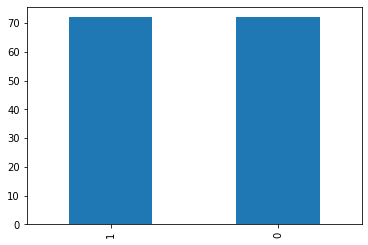

In [41]:
# 3rd class female passenger suvivors
df[(df['Sex'] == 'female') & (df['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

As we can see, being a female in 1st class is a strong indication of survival, while being a male in 3rd class is a strong indication of not surviving.